# Iris Flower Classification Problem

Instructor
- Aayush Raj Regmi

## Importing necessary libraries

In [2]:
import os
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Load the Iris dataset

In [3]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# Reading the Data Description
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

## Converting to Pandas DataFrame

In [5]:
dataset = pd.DataFrame(iris.data, columns=iris.feature_names)
dataset['target'] = iris.target
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Preparing the Data

In [6]:
X, y = iris.data, iris.target
target_names = iris.feature_names
print("Shape of Data: ", X.shape, y.shape)
print(target_names)

Shape of Data:  (150, 4) (150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Splitting the Data to 80% train and 20% test

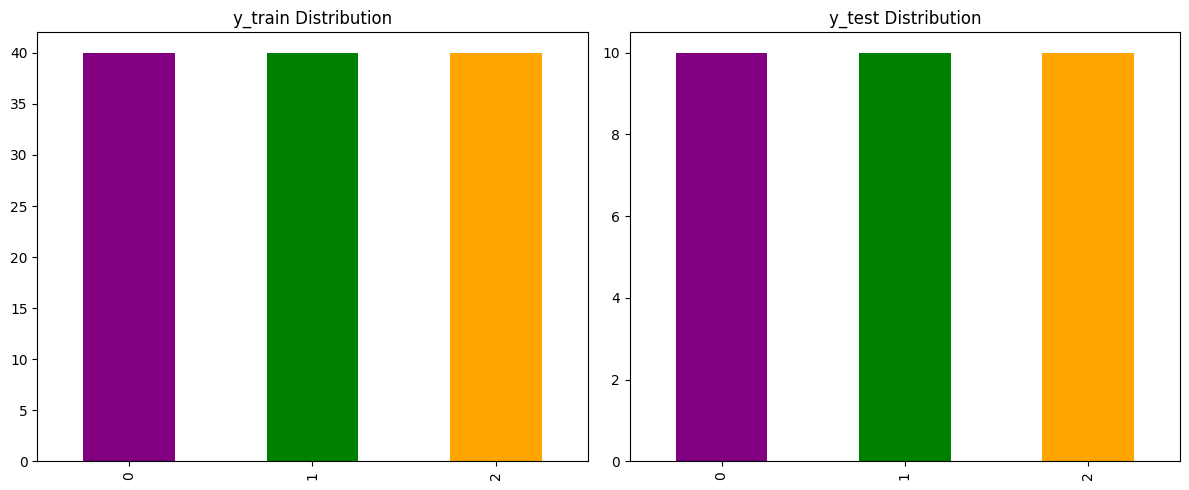

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y,
)
# Data Distribution visualization
plt.figure(figsize=(12, 5))

# Plot y_train
plt.subplot(1, 2, 1)
pd.Series(y_train).value_counts().sort_index().plot(kind="bar", color=["purple", "g", "orange"])
plt.title("y_train Distribution")

# Plot y_test
plt.subplot(1, 2, 2)
pd.Series(y_test).value_counts().sort_index().plot(kind="bar", color=["purple", "g", "orange"])
plt.title("y_test Distribution")
plt.tight_layout()
plt.show()

## Defining the Decision Tree Classifier

In [8]:
print("Training Logistic Regression model...")

model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=41,
)  # log-loss and entropy can also be used depending upon choice

Training Logistic Regression model...


## Fitting the model

In [9]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=41)

## Evaluating the model

In [10]:
accuracy = model.score(X_test, y_test)
print(f"Model trained. Test Accuracy: {accuracy*100:.2f}%")

Model trained. Test Accuracy: 96.67%


## Saving the model

In [12]:
import joblib

MODEL_DIR = Path("models/")
MODEL_DIR.mkdir(parents=True, exist_ok=True)

MODEL_PATH = MODEL_DIR / "iris_dtree.joblib"


print(f"Saving model to: {MODEL_PATH}")
joblib.dump(model, MODEL_PATH)
print("Model saved successfully.")

Saving model to: models/iris_dtree.joblib
Model saved successfully.
